# Data Analysis

We will work with model Diabetes130US from openml with id 45069, first we will load this dataset.

In [1]:
import openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch


dataset_id = 45069

dataset = openml.datasets.get_dataset(dataset_id)
X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)


if y is not None:
    df = pd.concat([X, y], axis=1)
else:
    df = X

df.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,class
0,1,3,7,4,41,2,17,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,5,1,1,3,64,0,10,0,0,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,2,1,1,2,39,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,3,1,1,1,39,2,12,0,0,1,...,No,No,No,No,No,No,No,No,No,NO
4,3,1,1,3,21,2,23,1,0,0,...,No,No,No,No,No,No,No,Ch,Yes,NO


First we load the dataset from OpenML (if we run this for the first time we also download OpenML with pip).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   admission_type_id         101766 non-null  uint8   
 1   discharge_disposition_id  101766 non-null  uint8   
 2   admission_source_id       101766 non-null  uint8   
 3   time_in_hospital          101766 non-null  uint8   
 4   num_lab_procedures        101766 non-null  uint8   
 5   num_procedures            101766 non-null  uint8   
 6   num_medications           101766 non-null  uint8   
 7   number_outpatient         101766 non-null  uint8   
 8   number_emergency          101766 non-null  uint8   
 9   number_inpatient          101766 non-null  uint8   
 10  number_diagnoses          101766 non-null  uint8   
 11  race                      99493 non-null   category
 12  gender                    101766 non-null  category
 13  age                       101

We can see that we have 101 766 records with 48 features, 36 being categorical, 1 being object and 11 being integer.

In [3]:
df.nunique()

admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
number_diagnoses             16
race                          5
gender                        3
age                          10
weight                        9
payer_code                   17
medical_specialty            72
diag_1                      716
diag_2                      748
diag_3                      789
max_glu_serum                 4
A1Cresult                     4
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglita

We can see that examine and citoglipton have only 1 unique value, therefore we can drop them. We will also drop weight feature since it is filled in only 3197 times (which is about 3.14%).

In [4]:
columns_to_drop = ['examide', 'citoglipton', 'weight']

df = df.drop(columns=columns_to_drop)

print(f"Columns {columns_to_drop} have been dropped.")
print("\nDataFrame columns after dropping:")
print(df.columns)

Columns ['examide', 'citoglipton', 'weight'] have been dropped.

DataFrame columns after dropping:
Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race', 'gender', 'age',
       'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'class'],
      dtype='object')


Next we will take features that represent ids and feature class and make it into categorical features.

In [5]:
columns_to_convert_to_category = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'class']

for col in columns_to_convert_to_category:
    df[col] = df[col].astype('category')

print("Converted columns to category:")
print(df[columns_to_convert_to_category].dtypes)

Converted columns to category:
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
class                       category
dtype: object


In [6]:
categorical_cols = df.select_dtypes(include='category').columns

print("Unique values for categorical features:")

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())

Unique values for categorical features:

Column: admission_type_id
[1, 5, 2, 3, 6, 8, 4, 7]
Categories (8, uint8): [1, 2, 3, 4, 5, 6, 7, 8]

Column: discharge_disposition_id
[3, 1, 6, 22, 18, ..., 10, 17, 27, 19, 20]
Length: 26
Categories (26, uint8): [1, 2, 3, 4, ..., 24, 25, 27, 28]

Column: admission_source_id
[7, 1, 17, 6, 4, ..., 8, 22, 11, 25, 13]
Length: 17
Categories (17, uint8): [1, 2, 3, 4, ..., 17, 20, 22, 25]

Column: race
['AfricanAmerican', 'Caucasian', 'Hispanic', 'Other', NaN, 'Asian']
Categories (5, object): ['AfricanAmerican' < 'Asian' < 'Caucasian' < 'Hispanic' < 'Other']

Column: gender
['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female' < 'Male' < 'Unknown/Invalid']

Column: age
['[60-70)', '[50-60)', '[80-90)', '[40-50)', '[70-80)', '[90-100)', '[10-20)', '[30-40)', '[20-30)', '[0-10)']
Categories (10, object): ['[0-10)' < '[10-20)' < '[20-30)' < '[30-40)' ... '[60-70)' < '[70-80)' < '[80-90)' < '[90-100)']

Column: payer_code
['MC', 'MD', NaN,

Next we drop duplicates.

In [7]:
print("Shape before removing duplicates:", df.shape)

df.drop_duplicates(inplace=True)

print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (101766, 45)
Shape after removing duplicates: (101766, 45)


We have no duplicates.

In [8]:
print(df.isnull().sum())

admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
race                         2273
gender                          0
age                             0
payer_code                  40256
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

We have null values in race, payer_code, medical_specialty, diag_1, diag_2, diag_3 columns, we will add missing value for race, payer_code and medical_specialty. For diagnoses we will make columns for each possible diagnosis value and mark it as 1 if its pressent in either of diag_1, diag_2 or diag_3, since it doesnt matter if the diagnosis is in diag_1 or diag_3.

In [9]:
categorical_cols_with_missing = ['race','payer_code', 'medical_specialty']


for col in categorical_cols_with_missing:
    if col in df.columns:
        if pd.api.types.is_categorical_dtype(df[col].dtype):
            if 'Missing' not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories('Missing')
        df[col].fillna('Missing', inplace=True)

print("Missing values:")
display(df[categorical_cols_with_missing].isnull().sum())

Missing values:


C:\Users\maria\AppData\Local\Temp\ipykernel_7632\456492141.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col].dtype):
C:\Users\maria\AppData\Local\Temp\ipykernel_7632\456492141.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Missing', inplace=True)


race                 0
payer_code           0
medical_specialty    0
dtype: int64

In [10]:
all_diag_codes = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']]).unique()

all_diag_codes = [code for code in all_diag_codes if pd.notna(code)]

print(f"Number of unique diagnosis: {len(all_diag_codes)}")

print(all_diag_codes[:10])

Number of unique diagnosis: 915
['820', '276', '493', '250.4', '218', '250.6', '410', '486', '584', '428']


In [11]:

diag_cols_dict = {
    f'diag|{code}': ((df['diag_1'] == code) |
                      (df['diag_2'] == code) |
                      (df['diag_3'] == code)).astype(int)
    for code in all_diag_codes
}

diag_cols_df = pd.DataFrame(diag_cols_dict, index=df.index)

df = df.drop(columns=['diag_1', 'diag_2', 'diag_3'])

df = pd.concat([df, diag_cols_df], axis=1)

print("New DataFrame:")
display(df.head())


New DataFrame:


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag|744,diag|V22,diag|265,diag|E912,diag|E922,diag|E861,diag|E865,diag|387,diag|E966,diag|E864
0,1,3,7,4,41,2,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,1,3,64,0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,2,39,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,39,2,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,1,1,3,21,2,23,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Next we will take a look at numerical features.

In [12]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diag|820,diag|276,...,diag|744,diag|V22,diag|265,diag|E912,diag|E922,diag|E861,diag|E865,diag|387,diag|E966,diag|E864
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.011212,0.127361,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.105292,0.333378,...,0.003135,0.003135,0.003135,0.003135,0.003135,0.003135,0.003135,0.003135,0.003135,0.003135
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


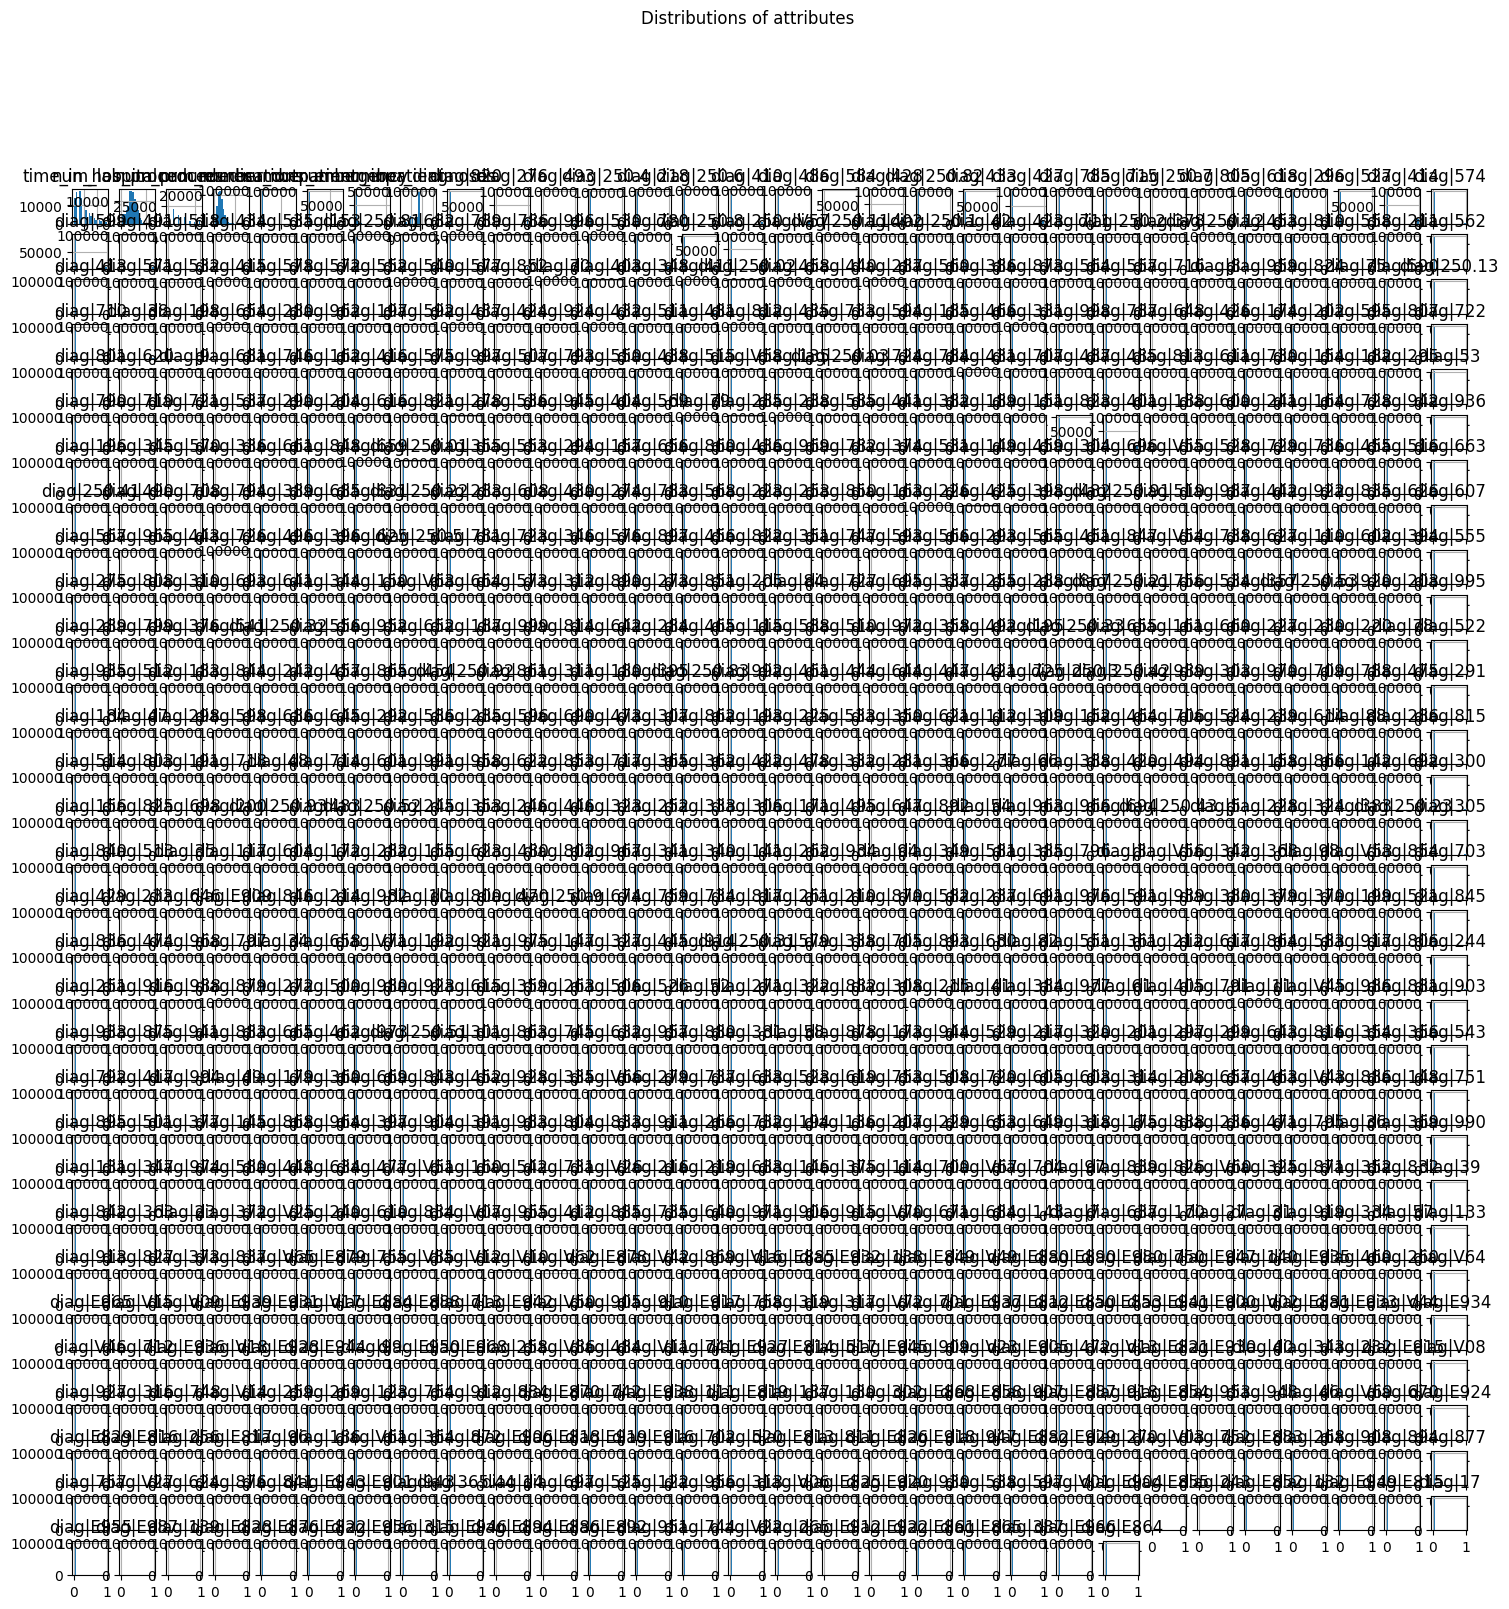

In [13]:
df.hist(figsize=(18, 18), bins=20)
plt.suptitle("Distributions of attributes")
plt.show()

Boxplots of selected numerical columns (excluding IDs):


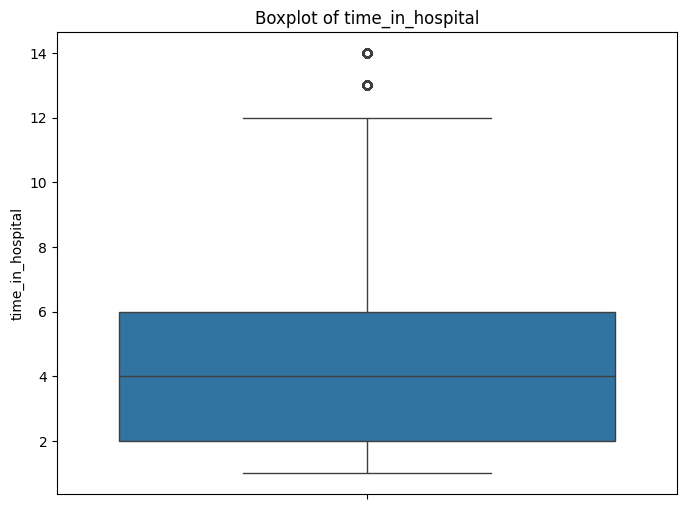

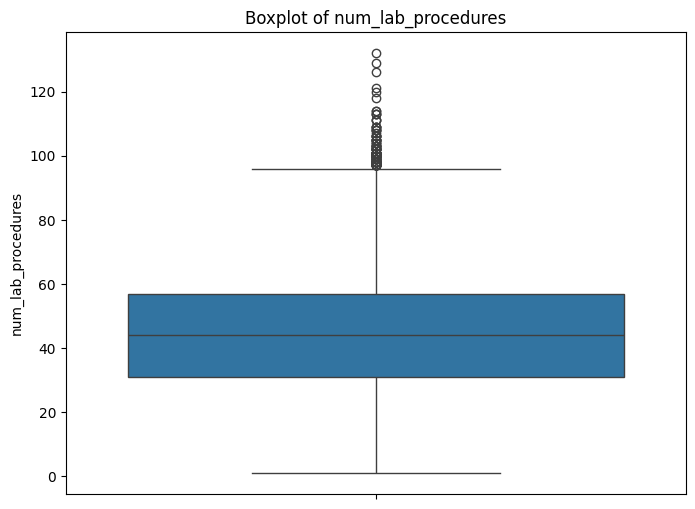

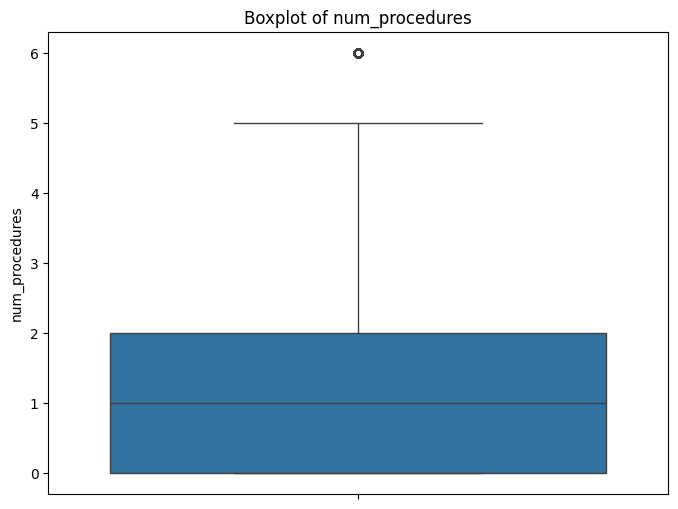

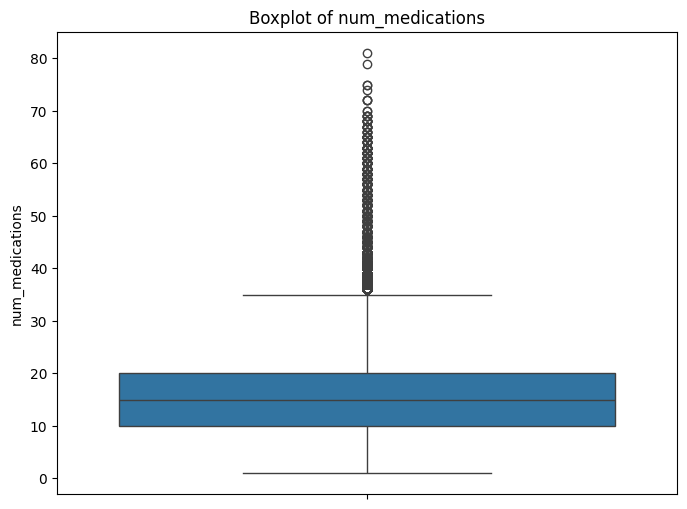

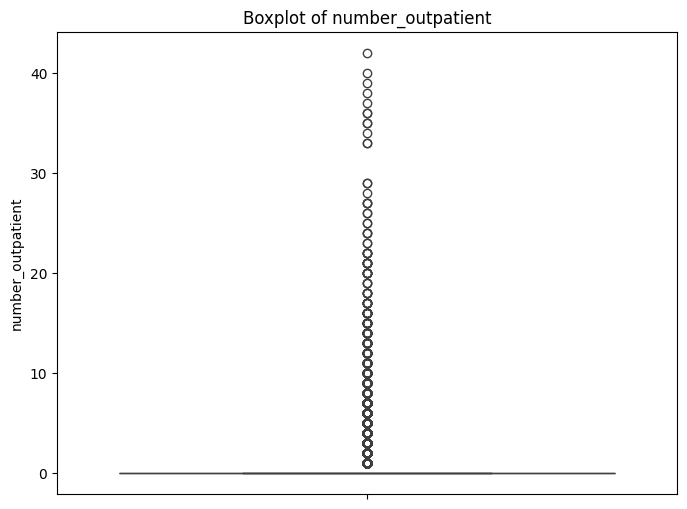

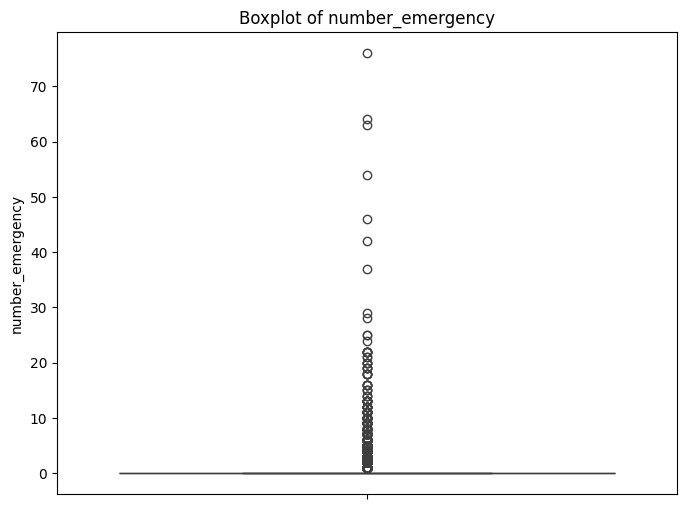

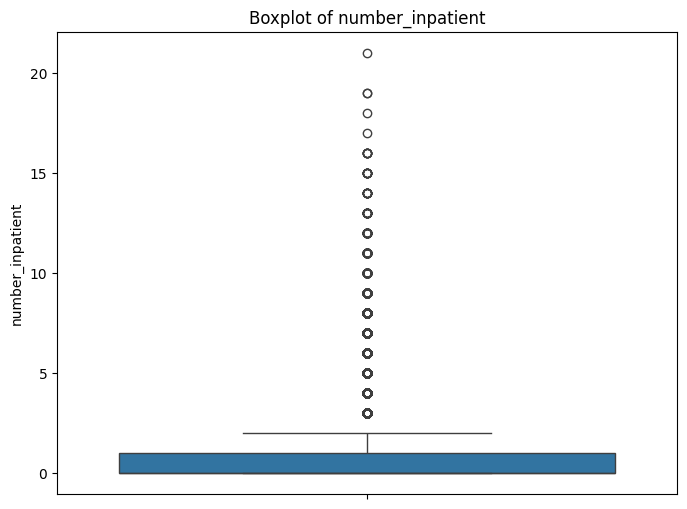

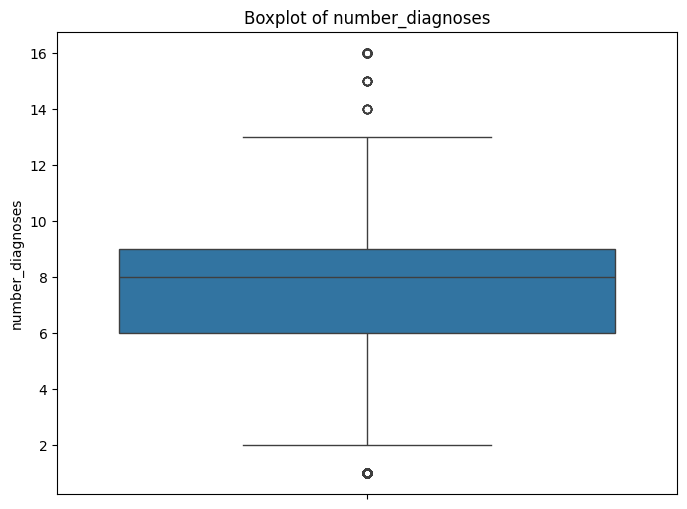

In [14]:
numerical_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
id_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

numerical_cols_for_plotting = [col for col in numerical_cols if col not in id_cols]

print("Boxplots of selected numerical columns (excluding IDs):")
for col in numerical_cols_for_plotting:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [15]:

print("Number of outliers (using IQR method):")

for col in numerical_cols_for_plotting:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"Column '{col}': {num_outliers} outliers")

Number of outliers (using IQR method):
Column 'time_in_hospital': 2252 outliers
Column 'num_lab_procedures': 143 outliers
Column 'num_procedures': 4954 outliers
Column 'num_medications': 2557 outliers
Column 'number_outpatient': 16739 outliers
Column 'number_emergency': 11383 outliers
Column 'number_inpatient': 7049 outliers
Column 'number_diagnoses': 281 outliers


We can see there are many outliers, but we won't replace all of them. For number_inpatient, number_emergency, number_outpatient the distribution is very tight around one number, if we would replace the outliers in these features, all the values would be the same. We would lose potential information. Therefore we will deal with outliers in number_diagnoses, num_lab_procedures, num_medications, num_procedures and time_in_hospital only, we will find outliers using IQR and then we will set them to the value of quantile bound. 

In [16]:
columns_to_cap_iqr = ['number_diagnoses', 'num_lab_procedures', 'num_medications', 'num_procedures', 'time_in_hospital']

for col in columns_to_cap_iqr:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else x)

    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else x)

print("\nDescriptive Statistics for capped columns after IQR capping:")
display(df[columns_to_cap_iqr].describe())


Descriptive Statistics for capped columns after IQR capping:


,number_diagnoses,num_lab_procedures,num_medications,num_procedures,time_in_hospital
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,7.422395,43.087210,15.808512,1.291050,4.363618
std,1.925325,19.648915,7.396645,1.581884,2.892181
min,1.500000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,31.000000,10.000000,0.000000,2.000000
50%,8.000000,44.000000,15.000000,1.000000,4.000000
75%,9.000000,57.000000,20.000000,2.000000,6.000000
max,13.500000,96.000000,35.000000,5.000000,12.000000


Boxplots for columns after IQR-based outlier capping:


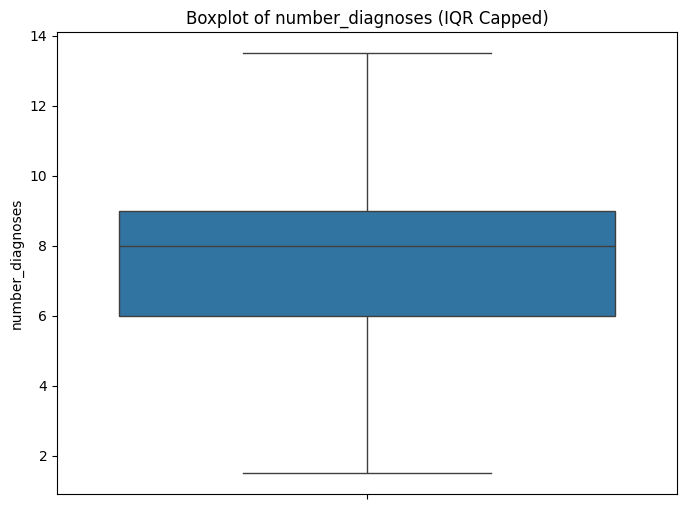

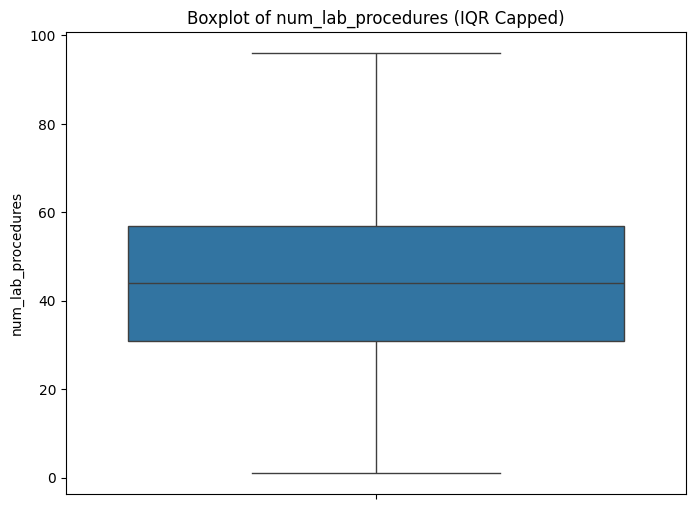

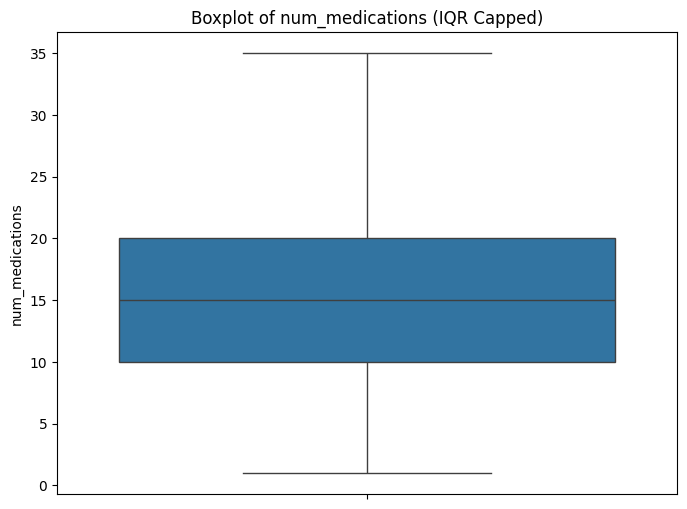

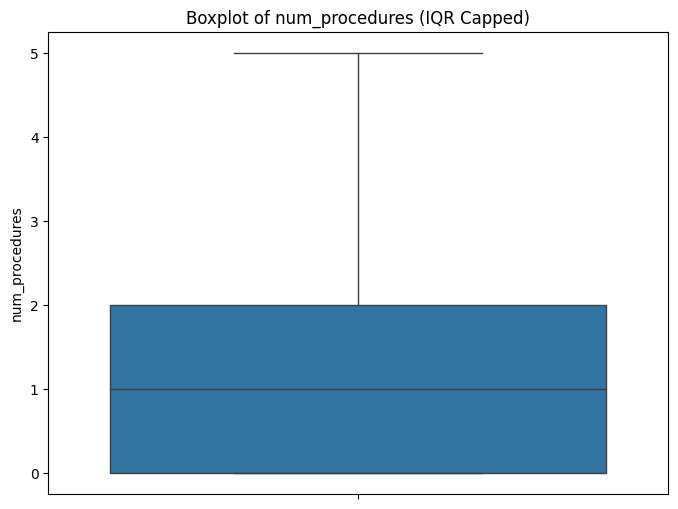

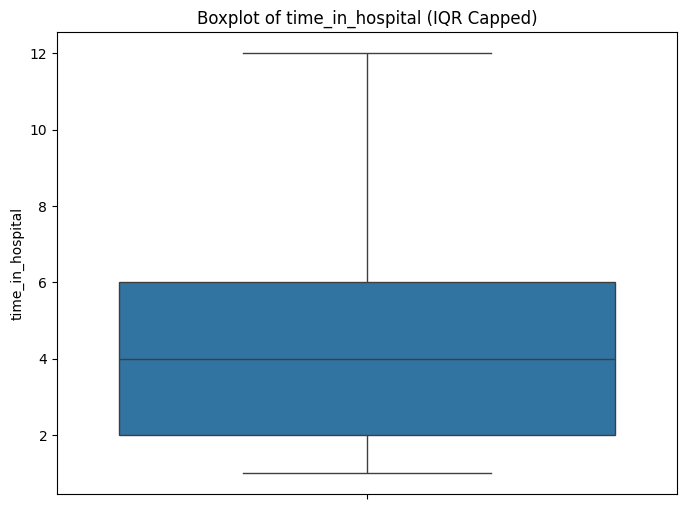

In [17]:

columns_to_plot_iqr_capped = ['number_diagnoses', 'num_lab_procedures', 'num_medications', 'num_procedures', 'time_in_hospital']

print("Boxplots for columns after IQR-based outlier capping:")

for col in columns_to_plot_iqr_capped:

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col} (IQR Capped)')
    plt.ylabel(col)
    plt.show()


Now we can see there are no outliers in these selected features.

At last we will scale the features to be in range of -1,1.

In [18]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Scaled numerical features:")
display(df[numerical_cols].head())

Scaled numerical features:


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.272727,0.421053,0.4,0.470588,0.00000,0.0,0.000000,0.625000
1,0.181818,0.663158,0.0,0.264706,0.00000,0.0,0.047619,0.458333
2,0.090909,0.400000,0.0,0.205882,0.00000,0.0,0.000000,0.041667
3,0.000000,0.400000,0.4,0.323529,0.00000,0.0,0.047619,0.125000
4,0.181818,0.210526,0.4,0.647059,0.02381,0.0,0.000000,0.625000


Next step is to encode categories to be represented by numbers only.

In [19]:
categorical_cols_for_encoding = df.select_dtypes(include=['category']).columns.tolist()

cols_to_keep_all = [col for col in categorical_cols_for_encoding if df[col].nunique() > 2]

cols_to_drop_first = [col for col in categorical_cols_for_encoding if df[col].nunique() == 2]

df = pd.get_dummies(df, columns=cols_to_drop_first, drop_first=True, prefix_sep='|')

df = pd.get_dummies(df, columns=cols_to_keep_all, drop_first=False, prefix_sep='|')



print("Shape of new DataFrame:", df.shape)
print("\nColumns after one-hot encoding:")
print(df.columns)

df.head()


Shape of new DataFrame: (101766, 1159)

Columns after one-hot encoding:
Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'diag|820', 'diag|276',
       ...
       'insulin|No', 'insulin|Steady', 'insulin|Up',
       'glyburide.metformin|Down', 'glyburide.metformin|No',
       'glyburide.metformin|Steady', 'glyburide.metformin|Up', 'class|<30',
       'class|>30', 'class|NO'],
      dtype='object', length=1159)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diag|820,diag|276,...,insulin|No,insulin|Steady,insulin|Up,glyburide.metformin|Down,glyburide.metformin|No,glyburide.metformin|Steady,glyburide.metformin|Up,class|<30,class|>30,class|NO
0,0.272727,0.421053,0.4,0.470588,0.00000,0.0,0.000000,0.625000,1,0,...,False,True,False,False,True,False,False,False,False,True
1,0.181818,0.663158,0.0,0.264706,0.00000,0.0,0.047619,0.458333,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0.090909,0.400000,0.0,0.205882,0.00000,0.0,0.000000,0.041667,0,0,...,False,True,False,False,True,False,False,False,False,True
3,0.000000,0.400000,0.4,0.323529,0.00000,0.0,0.047619,0.125000,0,0,...,True,False,False,False,True,False,False,False,False,True
4,0.181818,0.210526,0.4,0.647059,0.02381,0.0,0.000000,0.625000,0,0,...,True,False,False,False,True,False,False,False,False,True


In [20]:
encoded_columns = df.columns

feature_counts = {}

for col in encoded_columns:
    parts = col.split('|')

    if len(parts) > 1:
        original_feature = parts[0]

        if original_feature in feature_counts:
            feature_counts[original_feature] += 1
        else:
            feature_counts[original_feature] = 1


print("Number of encoded columns per original feature:")
for feature, count in feature_counts.items():
    print(f"{feature}: {count}")

Number of encoded columns per original feature:
diag: 915
acetohexamide: 1
tolbutamide: 1
troglitazone: 1
glipizide.metformin: 1
glimepiride.pioglitazone: 1
metformin.rosiglitazone: 1
metformin.pioglitazone: 1
change: 1
diabetesMed: 1
admission_type_id: 8
discharge_disposition_id: 26
admission_source_id: 17
race: 6
gender: 3
age: 10
payer_code: 18
medical_specialty: 73
max_glu_serum: 4
A1Cresult: 4
metformin: 4
repaglinide: 4
nateglinide: 4
chlorpropamide: 4
glimepiride: 4
glipizide: 4
glyburide: 4
pioglitazone: 4
rosiglitazone: 4
acarbose: 4
miglitol: 4
tolazamide: 3
insulin: 4
glyburide.metformin: 4
class: 3


Now we have our dataset with numeric features only, but it has 1159 features. We will try and drop features that have either small correlation or have low importance.

In [21]:
correlation_matrix = df.corrwith(df['diabetesMed|Yes'])

encoded_cols = [col for col in df.columns if df[col].dtype != 'float']
df[encoded_cols] = df[encoded_cols].astype(int)


print("\nCorrelation with 'diabetesMed|Yes':")
display(correlation_matrix.sort_values(ascending=False).head(30))
display(correlation_matrix.sort_values(ascending=True).head(30))


Correlation with 'diabetesMed|Yes':


diabetesMed|Yes                       1.000000
insulin|Steady                        0.360434
metformin|Steady                      0.256281
insulin|Down                          0.201861
glipizide|Steady                      0.193680
num_medications                       0.193321
insulin|Up                            0.193296
glyburide|Steady                      0.173046
pioglitazone|Steady                   0.148253
rosiglitazone|Steady                  0.137996
glimepiride|Steady                    0.119850
A1Cresult|>8                          0.093123
repaglinide|Steady                    0.064168
time_in_hospital                      0.063169
diag|250.02                           0.058306
metformin|Up                          0.056254
glyburide|Up                          0.049011
glipizide|Up                          0.047717
class|>30                             0.046396
glyburide.metformin|Steady            0.045218
payer_code|MC                         0.044897
nateglinide|S

insulin|No                    -0.585464
change|No                     -0.506370
metformin|No                  -0.270176
glipizide|No                  -0.206230
glyburide|No                  -0.186835
pioglitazone|No               -0.152230
rosiglitazone|No              -0.141157
glimepiride|No                -0.126699
payer_code|Missing            -0.075663
discharge_disposition_id|18   -0.069842
A1Cresult|None                -0.069683
repaglinide|No                -0.067718
class|NO                      -0.061508
max_glu_serum|Norm            -0.046610
glyburide.metformin|No        -0.045677
nateglinide|No                -0.045579
diag|560                      -0.041975
discharge_disposition_id|11   -0.033247
diag|562                      -0.032704
diag|789                      -0.031176
admission_type_id|6           -0.030737
payer_code|HM                 -0.030696
acarbose|No                   -0.030110
age|[90-100)                  -0.029543
admission_source_id|5         -0.027727


In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diabetesMed|Yes'])
y = df['diabetesMed|Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)

importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted.head(50))

insulin|No                     0.213665
insulin|Steady                 0.113936
change|No                      0.099622
metformin|No                   0.054329
metformin|Steady               0.046696
glipizide|No                   0.037536
glipizide|Steady               0.036931
glyburide|No                   0.035107
glyburide|Steady               0.031467
insulin|Down                   0.024147
insulin|Up                     0.021271
pioglitazone|No                0.017476
pioglitazone|Steady            0.017219
num_medications                0.016498
glimepiride|Steady             0.014636
glimepiride|No                 0.014391
rosiglitazone|No               0.013940
rosiglitazone|Steady           0.013675
num_lab_procedures             0.008100
time_in_hospital               0.005927
number_diagnoses               0.004706
repaglinide|No                 0.004435
num_procedures                 0.003829
repaglinide|Steady             0.003725
number_inpatient               0.003229


In [23]:
correlated_features = correlation_matrix[abs(correlation_matrix) > 0.05].index.tolist()

important_features = importances_sorted[importances_sorted > 0.005].index.tolist()

selected_features = list(set(correlated_features) | set(important_features))

if 'diabetesMed|Yes' in selected_features:
    selected_features.remove('diabetesMed|Yes')

print("Features with absolute correlation > 0.05:")
print(correlated_features)
print(f"\nNumber of selected features: {len(correlated_features)}")
print("\nFeatures with importance > 0.005:")
print(important_features)
print(f"\nNumber of selected features: {len(important_features)}")
print("\nSelected features (meeting both criteria):")
print(selected_features)
print(f"\nNumber of selected features: {len(selected_features)}")

Features with absolute correlation > 0.05:
['time_in_hospital', 'num_medications', 'diag|250.02', 'change|No', 'diabetesMed|Yes', 'discharge_disposition_id|18', 'payer_code|Missing', 'A1Cresult|>8', 'A1Cresult|None', 'metformin|No', 'metformin|Steady', 'metformin|Up', 'repaglinide|No', 'repaglinide|Steady', 'glimepiride|No', 'glimepiride|Steady', 'glipizide|No', 'glipizide|Steady', 'glyburide|No', 'glyburide|Steady', 'pioglitazone|No', 'pioglitazone|Steady', 'rosiglitazone|No', 'rosiglitazone|Steady', 'insulin|Down', 'insulin|No', 'insulin|Steady', 'insulin|Up', 'class|NO']

Number of selected features: 29

Features with importance > 0.005:
['insulin|No', 'insulin|Steady', 'change|No', 'metformin|No', 'metformin|Steady', 'glipizide|No', 'glipizide|Steady', 'glyburide|No', 'glyburide|Steady', 'insulin|Down', 'insulin|Up', 'pioglitazone|No', 'pioglitazone|Steady', 'num_medications', 'glimepiride|Steady', 'glimepiride|No', 'rosiglitazone|No', 'rosiglitazone|Steady', 'num_lab_procedures', 

We have chosen to select features that have either correlation higher than 0.05 or importance higher then 0.005. This gives us 29 features

In [24]:
X = df[selected_features]
y = df['diabetesMed|Yes']
dataset = pd.concat([X, y], axis=1)
dataset.head()

,metformin|Up,change|No,A1Cresult|None,pioglitazone|No,num_medications,time_in_hospital,insulin|Down,glimepiride|No,pioglitazone|Steady,insulin|Steady,...,A1Cresult|>8,insulin|No,discharge_disposition_id|18,metformin|Steady,metformin|No,glyburide|Steady,repaglinide|No,glimepiride|Steady,glipizide|No,diabetesMed|Yes
0,0,0,1,1,0.470588,0.272727,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
1,0,0,1,1,0.264706,0.181818,0,1,0,1,...,0,0,0,0,1,1,1,0,1,1
2,0,0,1,1,0.205882,0.090909,0,1,0,1,...,0,0,0,1,0,0,1,0,1,1
3,0,1,1,1,0.323529,0.000000,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0,0,1,1,0.647059,0.181818,0,1,0,0,...,0,1,0,1,0,1,1,0,1,1


Class distribution:
 diabetesMed|Yes
1    78363
0    23403
Name: count, dtype: int64


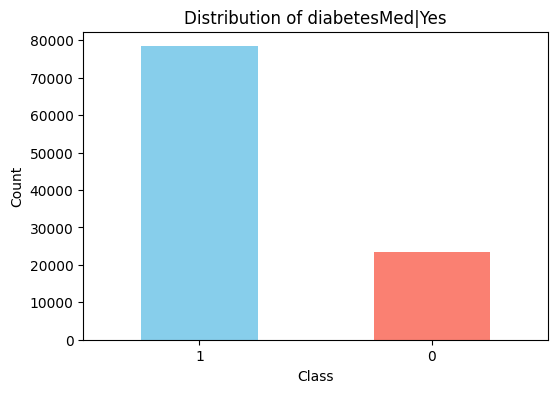

In [25]:
class_counts = dataset['diabetesMed|Yes'].value_counts()
print("Class distribution:\n", class_counts)

# --- Plot distribution ---
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Distribution of diabetesMed|Yes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dataset is imbalanced, therefore we will punish misclassification of the minority group more heavily.

In [27]:
dataset.to_csv('../processed dataset/processed_dataset.csv', index=False)